In [41]:
import pandas as pd
import numpy as np

from datetime import date
from scipy import stats

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [91]:
def load_ymd_df(path):
    df = pd.read_json(path, lines=True)
    df = df[df.year >= 2017]
    df['date'] = df.apply(lambda r: date(int(r.year), int(r.month), int(r.day)), 1)
    df = df.sort_values('date')
    return df

In [92]:
dh_vol_tweets = load_ymd_df('../../data/decahose-vol-tweets.json/part-00000-accff8bd-8a8f-4cec-8a58-90aca925b3bc-c000.json')

In [93]:
dh_vol_links = load_ymd_df('../../data/decahose-vol-links.json/part-00000-5cafe3fa-4640-4a9c-9738-3ebd57e2aa61-c000.json')

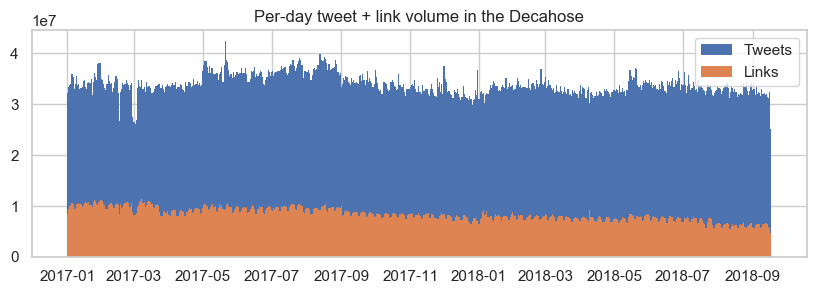

In [98]:
plt.figure(figsize=(10,3), dpi=100)

plt.title('Per-day tweet + link volume in the Decahose')

plt.bar(dh_vol_tweets.date.unique(), dh_vol_tweets['count'], linewidth=0, width=1, label='Tweets')
plt.bar(dh_vol_links.date.unique(), dh_vol_links['count'], linewidth=0, width=1, label='Links')
plt.legend()

plt.savefig('figures/decahose-tweet-link-vol.png', bbox_inches='tight')

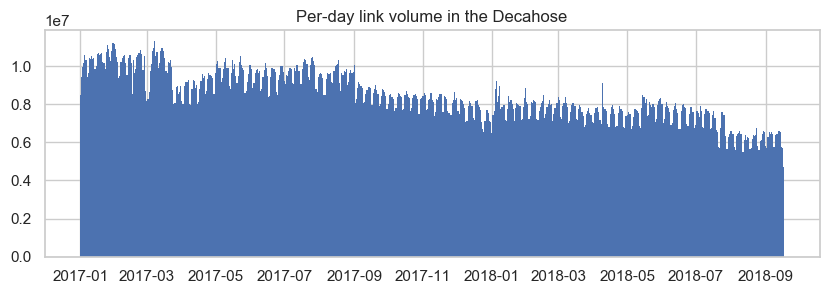

In [101]:
plt.figure(figsize=(10,3), dpi=100)

plt.title('Per-day link volume in the Decahose')

plt.bar(dh_vol_links.date.unique(), dh_vol_links['count'], linewidth=0, width=1)

plt.savefig('figures/decahose-link-vol.png', bbox_inches='tight')

In [95]:
dh_vol_tweets['count'].sum()

21219935342

In [96]:
dh_vol_links['count'].sum()

5243960217

In [97]:
dh_vol_links['count'].sum() / dh_vol_tweets['count'].sum()

0.24712423164743497

In [11]:
tweet_pdf.date.max()

datetime.date(2018, 9, 17)

In [12]:
len(tweet_pdf)

625

In [103]:
overall_dc = pd.read_json('../../data/overall-domain-link-counts.json/part-00000-c2479239-2ad9-4e07-b404-d9da7280638a-c000.json', lines=True)

In [104]:
overall_dc = overall_dc[overall_dc.do]
overall_dc.sort_values('count', ascending=False)

,count,domain
0,1544417666,twitter.com
1,435940757,NaN
2,288172316,youtube.com
3,287335529,du3a.org
4,186908532,facebook.com
5,119093028,instagram.com
6,78151700,d3waapp.org
7,65399774,google.com
8,50613974,curiouscat.me
9,37106482,tistory.com


In [64]:
link_ts_counts = pd.read_json('../../data/domain-link-ts-counts.json/part-00000-9e1063a9-9847-4a0e-96fd-74c637882e67-c000.json', lines=True)
link_ts_counts = link_ts_counts[link_ts_counts.year >= 2017]

In [72]:
article_ts_counts = pd.read_json('../../data/domain-article-ts-counts.json/part-00000-edd2a29f-0be2-4ebc-bb4f-6e95f5afdc43-c000.json', lines=True)
article_ts_counts = article_ts_counts[article_ts_counts.year >= 2017]

In [65]:
imp_ts_counts = pd.read_json('../../data/domain-imp-ts-counts.json/part-00000-fb29a2f7-5c24-4ab2-bc6e-3fe1b019a902-c000.json', lines=True)
imp_ts_counts = imp_ts_counts[imp_ts_counts.year >= 2017]
imp_ts_counts = imp_ts_counts.rename(columns={'imp': 'count'})

In [66]:
link_counts = link_ts_counts.groupby('domain').sum().sort_values('count', ascending=False)[['count']].reset_index()

In [67]:
len(link_counts)

87

In [68]:
', '.join(list(link_counts.domain))

'nytimes.com, cnn.com, washingtonpost.com, thehill.com, theguardian.com, foxnews.com, bbc.co.uk, reuters.com, breitbart.com, huffingtonpost.com, buzzfeed.com, politico.com, rt.com, independent.co.uk, yahoo.com, nbcnews.com, bloomberg.com, forbes.com, wsj.com, thegatewaypundit.com, businessinsider.com, cbsnews.com, usatoday.com, apnews.com, dailycaller.com, rawstory.com, vice.com, npr.org, truepundit.com, thedailybeast.com, cnbc.com, time.com, telegraph.co.uk, newsweek.com, nypost.com, sputniknews.com, nydailynews.com, washingtonexaminer.com, cbc.ca, vox.com, thinkprogress.org, theatlantic.com, newyorker.com, msn.com, ft.com, slate.com, theroot.com, variety.com, inc.com, dailykos.com, judicialwatch.org, msnbc.com, motherjones.com, aljazeera.com, economist.com, washingtontimes.com, dailywire.com, infowars.com, theintercept.com, axios.com, theonion.com, politicususa.com, thetimes.co.uk, nymag.com, salon.com, qz.com, nationalreview.com, palmerreport.com, townhall.com, thefederalist.com, hb

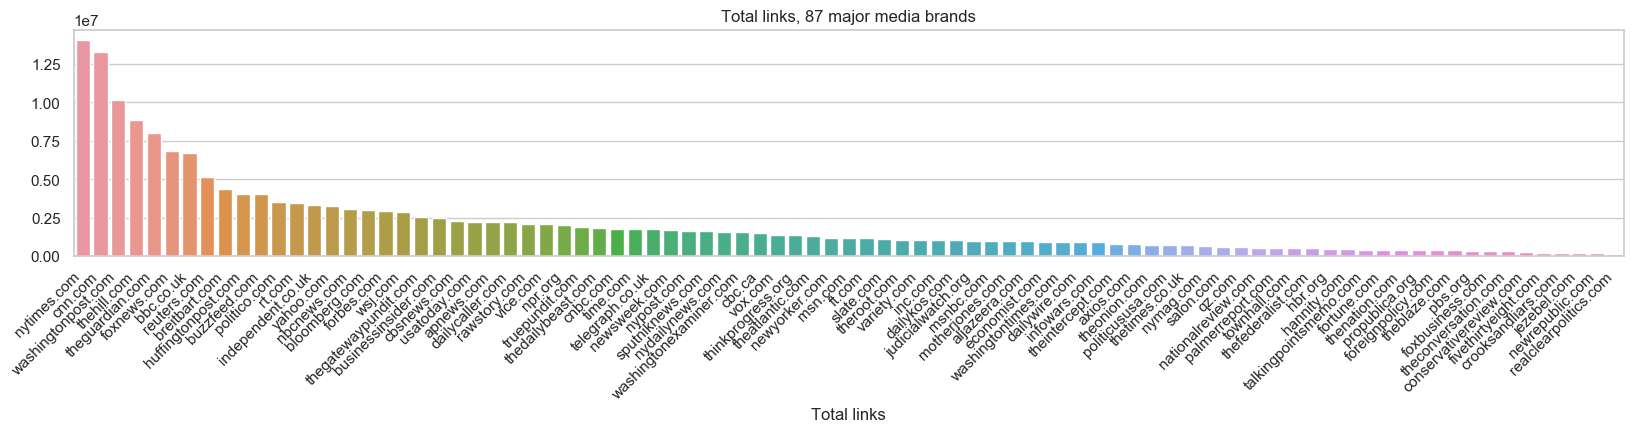

In [69]:
plt.figure(figsize=(20,3), dpi=100)

ax = sns.barplot(y='count', x='domain', data=link_counts)
plt.xticks(rotation=45, ha='right')

plt.title('Total links, 87 major media brands')
plt.xlabel('Total links')
plt.ylabel(None)
plt.savefig('figures/t87-link-counts.png', bbox_inches='tight')

In [73]:
article_counts = article_ts_counts.groupby('domain').sum().sort_values('count', ascending=False)[['count']].reset_index()

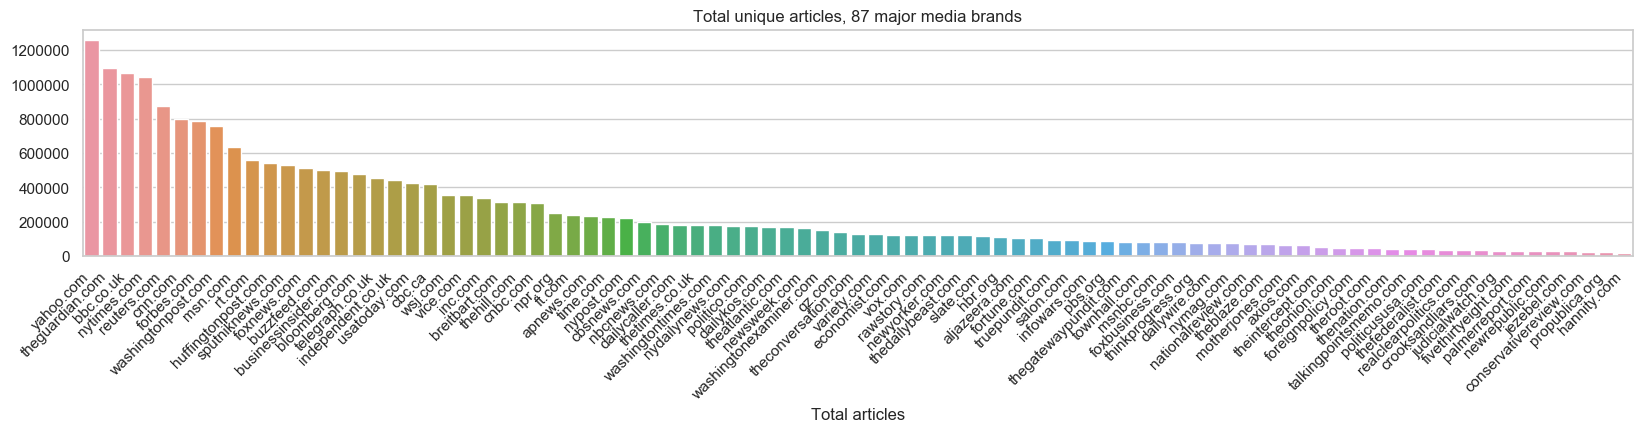

In [74]:
plt.figure(figsize=(20,3), dpi=100)

sns.barplot(y='count', x='domain', data=article_counts)
plt.xticks(rotation=45, ha='right')

plt.title('Total unique articles, 87 major media brands')
plt.xlabel('Total articles')
plt.ylabel(None)
plt.savefig('figures/t87-article-counts.png', bbox_inches='tight')

In [84]:
def plot_domain_ts(df, domain, w=10, h=3, dpi=100, title=None, dst=None):
    
    pdf = df[df.domain==domain].copy()
    pdf['date'] = pdf.apply(lambda r: date(r.year, r.month, r.day), 1)
    pdf = pdf.sort_values('date')
    
    plt.figure(figsize=(10,3), dpi=dpi)
    
    if title:
        plt.title(title)

    plt.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)
    
    if dst:
        plt.savefig(dst, bbox_inches='tight')

In [83]:
plot_domain_ts(link_ts_counts, 'nytimes.com', title='New York Times, links per day', dst='figures/nyt-links-per-day.png')

KeyError: 'date'

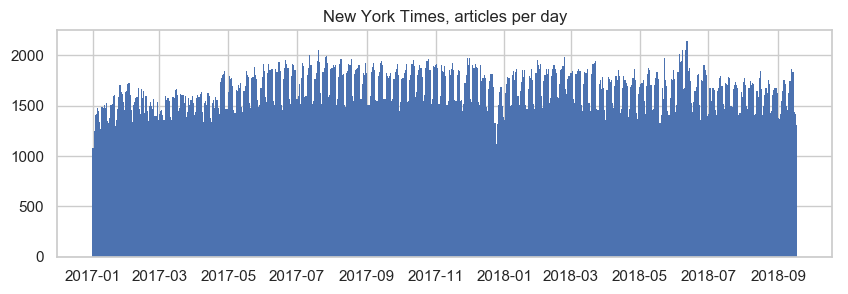

In [77]:
plot_domain_ts(article_ts_counts, 'nytimes.com', title='New York Times, articles per day', dst='figures/nyt-articles-per-day.png')

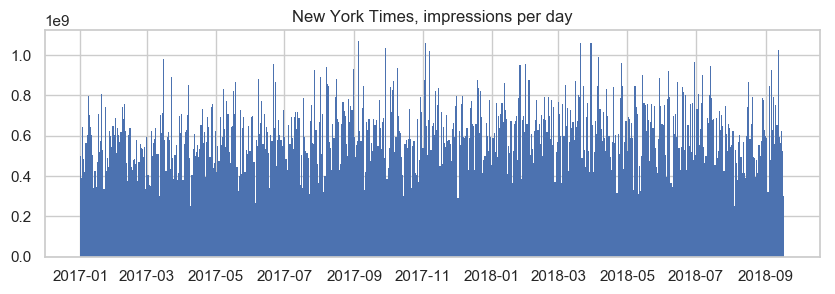

In [78]:
plot_domain_ts(imp_ts_counts, 'nytimes.com', title='New York Times, impressions per day', dst='figures/nyt-imp-per-day.png')

In [79]:
rows = []
for d in link_ts_counts.domain.unique():
    pdf = link_ts_counts[link_ts_counts.domain==d]
    lr = 

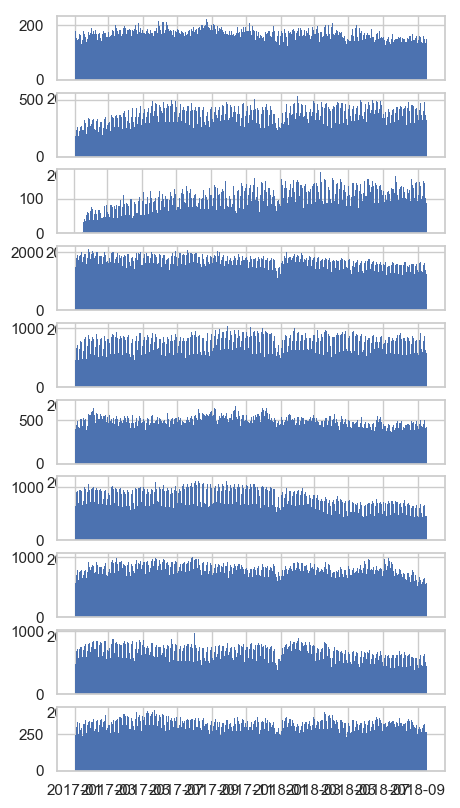

In [40]:
domains = link_ts_counts.domain.unique()

fig, axes = plt.subplots(10, 1, figsize=(5,10), dpi=100)

for i, d in enumerate(domains[:10]):

    ax = axes[i]
    pdf = article_ts_counts[(article_ts_counts.domain==d)&(article_ts_counts.year >= 2017)].copy()
    pdf['date'] = pdf.apply(lambda r: date(r.year, r.month, r.day), 1)
    pdf = pdf.sort_values('date')
    y_max = np.percentile(pdf['count'], 98)

#     fitx = np.array([pdf.window.min(), pdf.window.max()])
#     fity = r.slope * fitx + r.intercept

#     ax.set_yscale('log')
#     ax.set_ylim(0, y_max)
    ax.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)
#     ax.plot(fitx, fity, c='black', linewidth=3, alpha=0.7)
#     ax.set_xticks(tick_locs)
#     ax.set_xticklabels(tick_labels)

#     title = f'{r.d1} / {r.d2}'
#     ax.set_title(title, fontdict=dict(fontsize=16, fontweight='bold'))
#     ax.set_xlabel(None)
#     ax.set_ylabel('Accuracy')